In [3]:
## importo todas las librerias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn
from sklearn.datasets import load_boston

In [4]:
#cargo los datos
boston = load_boston()

In [14]:
#cargo los datos en un data frame con pandas 
bos = pd.DataFrame(boston.data)

In [10]:
print(bos.head(10))

        0     1     2    3      4      5      6       7    8      9     10  \
0  0.00632  18.0  2.31  0.0  0.538  6.575   65.2  4.0900  1.0  296.0  15.3   
1  0.02731   0.0  7.07  0.0  0.469  6.421   78.9  4.9671  2.0  242.0  17.8   
2  0.02729   0.0  7.07  0.0  0.469  7.185   61.1  4.9671  2.0  242.0  17.8   
3  0.03237   0.0  2.18  0.0  0.458  6.998   45.8  6.0622  3.0  222.0  18.7   
4  0.06905   0.0  2.18  0.0  0.458  7.147   54.2  6.0622  3.0  222.0  18.7   
5  0.02985   0.0  2.18  0.0  0.458  6.430   58.7  6.0622  3.0  222.0  18.7   
6  0.08829  12.5  7.87  0.0  0.524  6.012   66.6  5.5605  5.0  311.0  15.2   
7  0.14455  12.5  7.87  0.0  0.524  6.172   96.1  5.9505  5.0  311.0  15.2   
8  0.21124  12.5  7.87  0.0  0.524  5.631  100.0  6.0821  5.0  311.0  15.2   
9  0.17004  12.5  7.87  0.0  0.524  6.004   85.9  6.5921  5.0  311.0  15.2   

       11     12  
0  396.90   4.98  
1  396.90   9.14  
2  392.83   4.03  
3  394.63   2.94  
4  396.90   5.33  
5  394.12   5.21  
6  395.6

In [24]:
#cargo el nombre de cada columna del DataFrame a partir del dataset
bos.columns = boston.feature_names

In [26]:
#nombre de cada columna
boston.feature_names

array(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD',
       'TAX', 'PTRATIO', 'B', 'LSTAT'], dtype='<U7')

In [34]:
#agrego columna con los precios
bos['PRICE'] = boston.target

In [38]:
#salida de cada patrón
Y = bos['PRICE']

In [48]:
#entrada de cada patrón, sin la columna precio
# axis = 1 = columna 
X = bos.drop('PRICE', axis = 1)

In [46]:
X.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [49]:
Y.head()

0    24.0
1    21.6
2    34.7
3    33.4
4    36.2
Name: PRICE, dtype: float64

In [50]:
#importo el modelo de regresión lineal
from sklearn.linear_model import LinearRegression
#divido el conjunto de datos en un set para el entrenamiento y otro para el probar el modelo
X_train, X_test, Y_train, Y_test = sklearn.model_selection.train_test_split(X, Y, test_size = 0.33, random_state = 5)

In [54]:
print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)

(339, 13)
(167, 13)
(339,)
(167,)


In [57]:
#inicializo el modelo de regresuion lineal
lr = LinearRegression()

In [61]:
lr.fit(X_train, Y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [70]:
Y_train_predict = lr.predict(X_train)

In [74]:
result_train = pd.DataFrame(Y_train)
result_train['PRECICT_PRICE'] = Y_train_predict
result_train.head(10)

,PRICE,PRECICT_PRICE
435,13.4,13.160729
88,23.6,30.416545
365,27.5,13.561560
242,22.2,24.315972
461,17.7,20.601680
129,14.3,13.463874
12,21.7,21.764264
419,8.4,14.296725
152,15.3,18.676014
79,20.3,22.105772


In [91]:
Y_test_predict = lr.predict(X_test)
Y_test

226    37.6
292    27.9
90     22.6
373    13.8
273    35.2
417    10.4
503    23.9
234    29.0
111    22.8
472    23.2
99     33.2
339    19.0
309    20.3
304    36.1
272    24.4
346    17.2
412    17.9
151    19.6
496    19.7
410    15.0
490     8.1
132    23.0
224    44.8
318    23.1
284    32.2
444    10.8
321    23.1
116    21.2
333    22.2
351    24.1
       ... 
386    10.5
62     22.2
191    30.5
312    19.4
155    15.6
18     20.2
328    19.3
198    34.6
372    50.0
0      24.0
60     18.7
108    19.8
298    22.5
138    13.3
370    50.0
445    11.8
428    11.0
481    23.7
55     35.4
488    15.2
250    24.4
3      33.4
227    31.6
450    13.4
199    34.9
48     14.4
281    35.4
42     25.3
115    18.3
26     16.6
Name: PRICE, Length: 167, dtype: float64

In [101]:
#probamos que tan bien predice para los casos de test
result_test = pd.DataFrame(Y_test)
result_test['PREDICT_PRICE'] = Y_test_predict
result_test

,PRICE,PREDICT_PRICE
226,37.6,37.467236
292,27.9,31.391547
90,22.6,27.120196
373,13.8,6.468433
273,35.2,33.629667
417,10.4,5.670680
503,23.9,27.039467
234,29.0,29.927047
111,22.8,26.356613
472,23.2,22.452460


In [104]:
#calculo el error cuadratico medio del modelo entrenado
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(Y_test, Y_test_predict)
mse

28.530458765974583

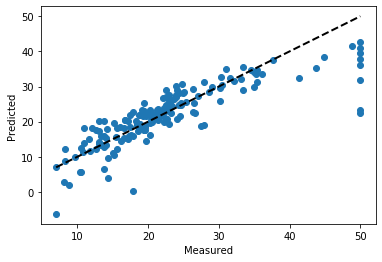

In [123]:
fig, ax = plt.subplots()
ax.scatter(Y_test, Y_test_predict)
ax.plot([Y_test.min(), Y_test.max()], [Y_test.min(), Y_test.max()], 'k--', lw = 2)
ax.set_xlabel("Measured")
ax.set_ylabel("Predicted")
plt.show()